In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

In [3]:
points = np.load('/data/hok/testdata/fastsc/GM_k4.npz.npy')

# FastSC

In [4]:
cluster_file = open('/data/hok/testdata/fastsc/GM_k4_k4_sc_output.txt', 'r')
cluster_file_reader = csv.reader(cluster_file, delimiter=' ')
cluster_file_reader.__next__()
cluster_results = [(int(rowid), int(cluster)) for rowid, cluster in cluster_file_reader]
cluster_file.close()

In [5]:
cluster_results = sorted(cluster_results, key=lambda item: item[0])
clusters = np.array([row[1] for row in cluster_results])

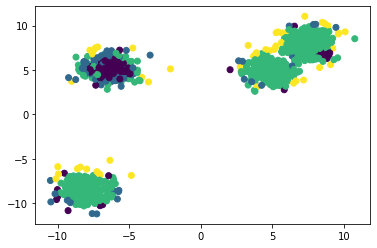

In [6]:
plt.scatter(points[:, 0], points[:, 1], c=clusters)

# scikit-learn kmeans

In [7]:
from sklearn.cluster import k_means

centroids, labels, intertia = k_means(points, n_clusters=4)

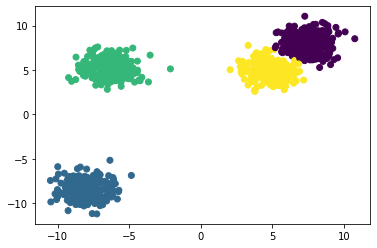

In [8]:
plt.scatter(points[:, 0], points[:, 1], c=labels)

# scikit-learn SpectralClustering

In [9]:
from sklearn.cluster import SpectralClustering

sklearn_sc = SpectralClustering(n_clusters=4, assign_labels='kmeans', random_state=0).fit(points)

# sklearn_sc.labels_

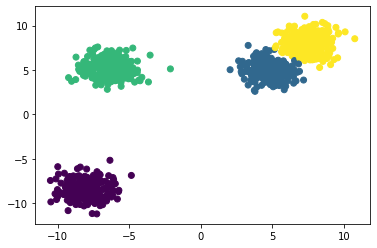

In [10]:
plt.scatter(points[:, 0], points[:, 1], c=sklearn_sc.labels_)

# SeqSC

In [14]:
from pyseqsc import seq_sc

In [15]:
from scipy.spatial.distance import euclidean

In [16]:
centroids, labels = seq_sc(points, 4, 4, euclidean, int(points.shape[0]/10))

/data/hok/conda/envs/hokdev/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


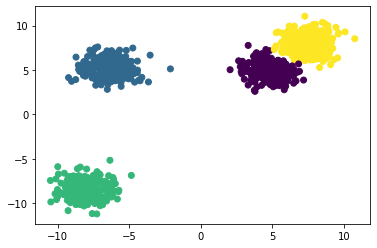

In [17]:
plt.scatter(points[:, 0], points[:, 1], c=labels)